In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind'])

import seaborn as sns
import pandas as pd


import tensorflow as tf
# tf.config.experimental.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Import MNIST dataset for handwritten numbers

- Training set contains 60.000 numbers
- Test set contains 10.000 numbers

In [24]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
X.shape

(60000, 28, 28)

In [26]:
num = 48000*28*28*200
print(f"{num:,}")

7,526,400,000


# Split Training set in training and validation data

- validation data is 20% of total set (12.000 samples)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.80)

# Plot first 4 digits of Trainingdata

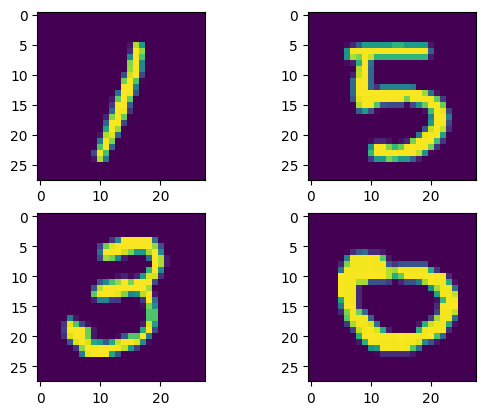

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 2)

ax1[0].imshow(X_train[0])
ax1[1].imshow(X_train[1])

ax2[0].imshow(X_train[2])
ax2[1].imshow(X_train[3])

plt.show()

# Activation functions

In a brain, the strenght of the ouputsignal of a neuron determines if the neuron is activated or not. This is the same for nodes in a neural network. The activation function is a function applied on the weights and biases of a node. The output determines if the node is activated or not. If the output is higher than 0, the node is activated. If the output is 0, the node is not activate.

There are different kind of activation functions.

## Linear activation function

The linear activation function is described as

$$f(x) = x$$

which is a linear line. The linear activation function is not a common activator because of following reasons:

- a linear function is applied to every node in the network. This means that the outcome is a bigger linear function. The hidden layers are therefor combined to one big linear node.
- the derivative of a linear function is a constant. This makes it impossible to minimize the cost-function.

## ReLU

The Rectified Linear Unit (ReLU) function is a linear function that 'rectifices' the x values below zero. All outputs for x values below zero are bound to zero.

$$ f(x) = max(0, x) $$

This means that not all nodes are activated when using the ReLU-function. This allows for a faster computation time, and an acceleration of convergence. The global minimum of the loss function will be reached faster. However, some nodes will after backpropagation not be activated. This means that the weight and bias of some nodes will not be updated. This will result in a less accurate model. This is called the Dead-ReLU problem.

## ELU

The exponential linear unit (ELU) is a variant of the ReLU. The ELU-function modifies the slop for negative values using a logarithmic curve. 

$$ f(x) = 
\begin{cases}
x \qquad \qquad \ \ x\geq 0 \\
\alpha(e^x - 1) \quad x<0\\
\end{cases}$$

The logarithmic curve gives ELU following advantages:

- The ELU function smoothens slowly.
- it avoids the Dead-ReLU problem for allowing the nodes to activate for negative value. This helps the network to update the bias and weights in the right direction.

The limitation:

- Slower computation.
- Exploding gradient problem, the output of the loss function is too high, which makes updates in weights and biases to extreme.


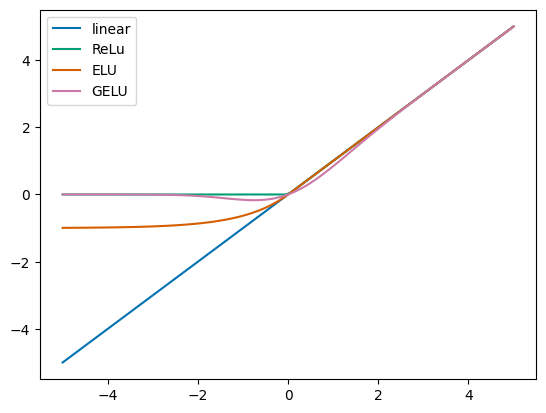

In [29]:
activation_layer1 = layers.Activation('linear')
activation_layer2 = layers.Activation('relu')
activation_layer3 = layers.Activation('elu')
activation_layer4 = layers.Activation('gelu')
x = tf.linspace(-5,5,100)
y1 = activation_layer1(x)
y2 = activation_layer2(x)
y3 = activation_layer3(x)
y4 = activation_layer4(x)

plt.plot(x,y1, label = 'linear')
plt.plot(x,y2, label = 'ReLu')
plt.plot(x,y3, label = 'ELU')
plt.plot(x,y4, label = 'GELU')

plt.legend()
plt.show()

# Defining the model

Input shape is the pixel density of the pictures (28x28)

In [30]:
model = keras.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'gelu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'gelu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'gelu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation= 'sigmoid')
])

# Compiling

## optimizer

The optimizer used is the `adam` optimizer, a stochastich gradient descent optimizer. The algorithm works the same as the normal gradient descent, but for every iteration a random set of samples is selected to minimize the cost function.

## Loss

The `sparse_categorical_crossentropy` function is used. This loss function works as a cross entropy function, only the oupots are not stored as vectors but as integers. This safes spase in memory.

In [31]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy', 'RootMeanSquaredError']
)

- `batch_size` is the number of batches in the training set. Every training iteration a random set of samples is selected to create a batch. The network will than train on that batch and update its weights and baises.

- The `epochs` are the number of iterations trough the complete trainingset. If you have 20 batches, all 20 batches will be trained on before 1 epoch is completed.

In [32]:
history = model.fit(
    X_train,
    y_train, 
    epochs=200,
    batch_size=2000,
    validation_data = (X_valid, y_valid),
    callbacks=[early_stopping])

Epoch 1/200
24/24 [==============================] - 2s 15ms/step - loss: 13.8899 - accuracy: 0.1844 - root_mean_squared_error: 4.9065 - val_loss: 1.7677 - val_accuracy: 0.5559 - val_root_mean_squared_error: 4.8947
Epoch 2/200
24/24 [==============================] - 0s 9ms/step - loss: 1.8841 - accuracy: 0.3536 - root_mean_squared_error: 4.9107 - val_loss: 1.1476 - val_accuracy: 0.5932 - val_root_mean_squared_error: 4.9107
Epoch 3/200
24/24 [==============================] - 0s 9ms/step - loss: 1.4025 - accuracy: 0.5179 - root_mean_squared_error: 4.9163 - val_loss: 0.8297 - val_accuracy: 0.7405 - val_root_mean_squared_error: 4.9177
Epoch 4/200
24/24 [==============================] - 0s 9ms/step - loss: 1.1490 - accuracy: 0.6057 - root_mean_squared_error: 4.9191 - val_loss: 0.6412 - val_accuracy: 0.8218 - val_root_mean_squared_error: 4.9233
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.9773 - accuracy: 0.6746 - root_mean_squared_error: 4.9238 - val_loss: 0

In [48]:
history_pd = pd.DataFrame(history.history)

<Axes: >

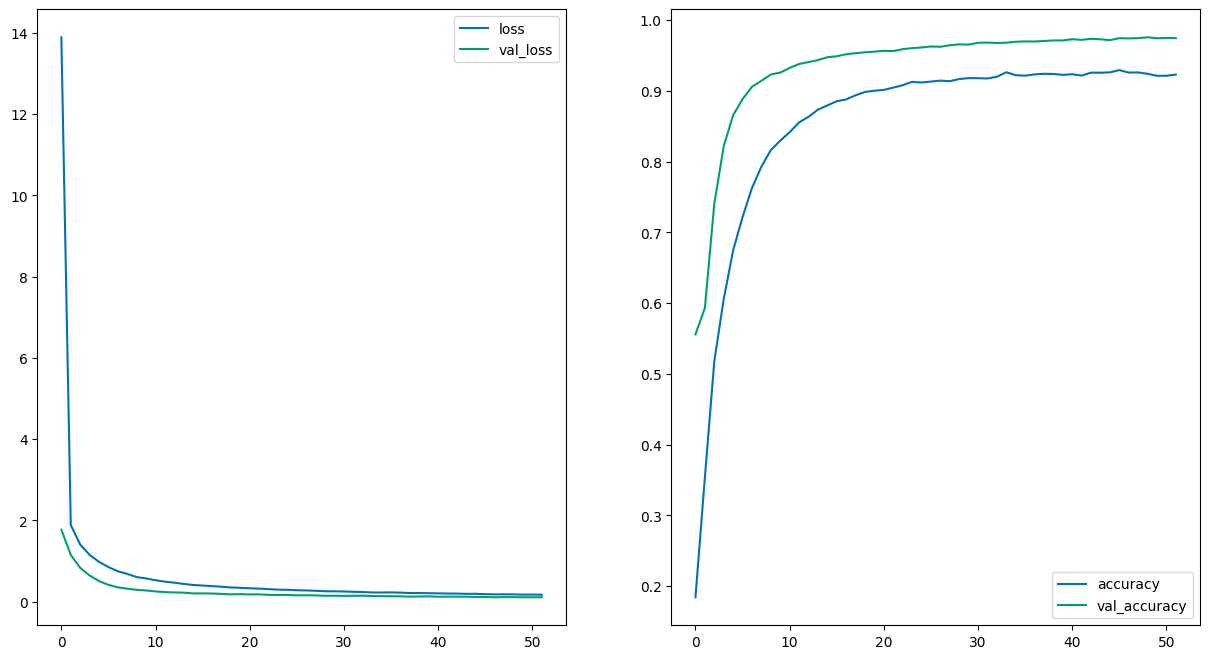

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
history_pd.loc[:, ['loss', 'val_loss']].plot(ax = ax[0])
history_pd.loc[:,['accuracy', 'val_accuracy']].plot(ax=ax[1])

When the model predicts it's y-values it returns probabilty. the `argmax()` function sets the feature with the highest probability to 1 and the rest to 0.

In [50]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 0s 807us/step


# Create Confusion Matrix for testset

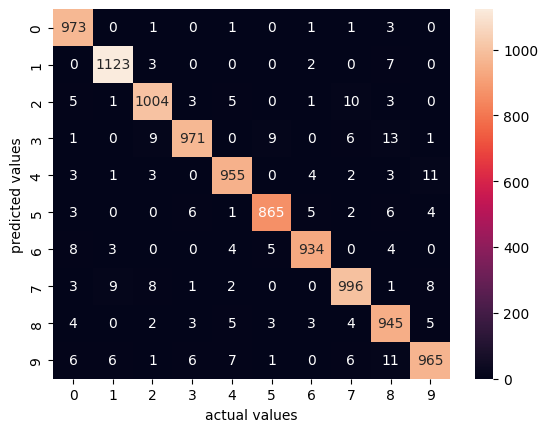

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# Calculate f1-scores

- `macro` calculates the f1 score for every feature, than avarages it.
- `micro` calculates the f1 score for every feature and multiplies it by a weigth that's dependent of the occurance of the feature. Than takes a complete avarege.

In [39]:
f1_1 = f1_score(y_test, y_pred, average=None)

In [40]:
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

In [41]:
f1_macro, f1_micro

(0.972961995508042, 0.9731)

# Plot the first 10 digits with corresponding prediction.

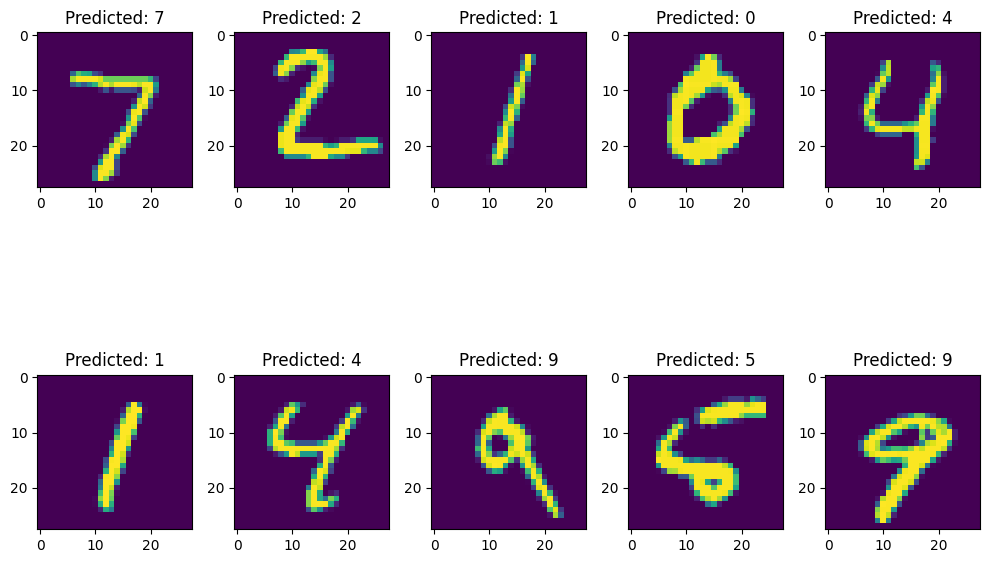

In [56]:
fig, ax = plt.subplots(2, 5, figsize=(10,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Predicted: {y_pred[i]}')
fig.tight_layout()
plt.show()